In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy.stats import multivariate_normal as mvn

In [3]:
train = pd.read_csv("~/Desktop/Work/ML_EIT/Data/MNIST_train.csv")
test = pd.read_csv("~/Desktop/Work/ML_EIT/Data/MNIST_test.csv")

In [4]:
test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape,test.shape)

(60000, 787) (10000, 787)


In [6]:
print(train.labels,test['labels'])

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: labels, Length: 60000, dtype: int64 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: labels, Length: 10000, dtype: int64


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 60.0 MB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [9]:
test_cnt = Counter(test.labels)
train_cnt = Counter(train['labels'])
print(test_cnt)
print(train_cnt)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


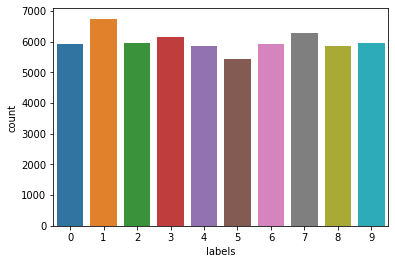

In [10]:
sns.countplot(train.labels)

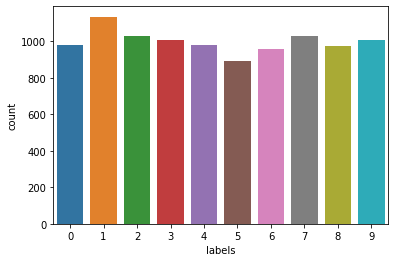

In [11]:
sns.countplot(test.labels)

In [12]:
# Change data set to numpy
test= test.to_numpy()
train = train.to_numpy()
print(train.shape,test.shape)

(60000, 787) (10000, 787)


In [13]:
# Each image size is 28 x 28 pixels = 784, and 2nd column is the labels
# The images are greyscale and the pixel range between 0 to 255
# Normalize the values over 255
X_train = np.asfarray(train[:,3:]) *(1/255)
y_train = np.asarray(train[:,2])

X_test = np.asfarray(test[:,3:]) *(1/255)
y_test = np.asarray(test[:,2])
print(y_train[0:20])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [14]:
# reshape the imags 784 = 28 x 28
# test_img1 = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1))
test_imgs1 = X_train.reshape((X_train.shape[0],28,28))

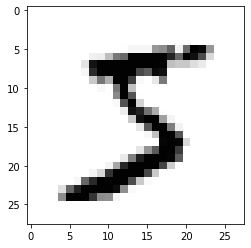

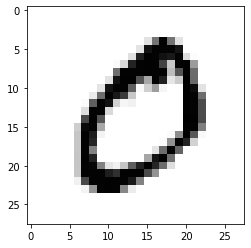

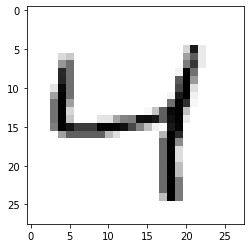

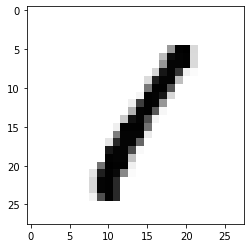

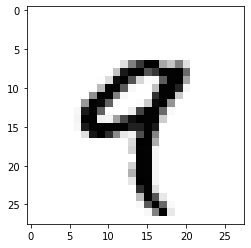

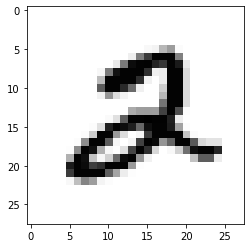

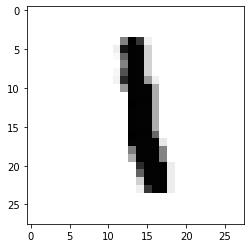

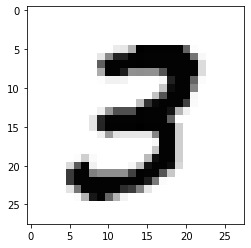

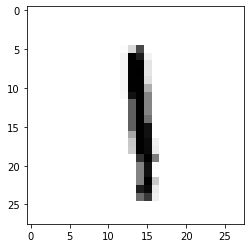

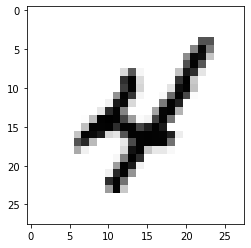

In [15]:
# We will look at some images in vertical way
for i in range(10):
    #img = test_imgs[i].reshape((28,28))
    img = test_imgs1[i]
    plt.imshow(img, cmap="Greys")
    plt.show()

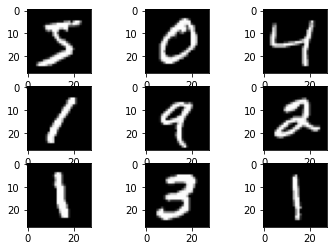

In [16]:
# Plot first some few images 3x3
for i in range(9):
#     plt.figure(figsize=(15,15))
    plt.subplot(330 +1 +i)
    #plot raw pixel data
    plt.imshow(test_imgs1[i], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
# check the size before beginning
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


## Gauss Bayes 

In [18]:
# GAUSSNB module/function
class GaussBayes1():
    def fit(self,X,y,epsilon=1e-03):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        for k in self.K:
            X_k = X[y==k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+ np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)

In [19]:
gnb = GaussBayes1()

In [20]:
gnb.fit(X_train,y_train)

In [21]:
y_hat = gnb.predict(X_test)

In [22]:
def accuracy(Y_test, y_hat):
    return np.mean(y_test == y_hat)

In [23]:
accuracy(y_train, y_hat)

0.9108

## Confusion Matrix

In [24]:
confuse_matrix = np.zeros((10,10))
for i in range(len(y_test)):
    confuse_matrix[y_test[i], y_hat[i]] += 1

pd.DataFrame(confuse_matrix)

,0,1,2,3,4,5,6,7,8,9
0,951.0,0.0,3.0,7.0,0.0,4.0,4.0,2.0,9.0,0.0
1,0.0,1098.0,8.0,3.0,1.0,0.0,6.0,0.0,19.0,0.0
2,8.0,3.0,942.0,17.0,4.0,1.0,3.0,4.0,49.0,1.0
3,8.0,0.0,9.0,904.0,1.0,9.0,0.0,5.0,60.0,14.0
4,1.0,0.0,13.0,2.0,877.0,0.0,4.0,5.0,12.0,68.0
5,7.0,0.0,2.0,40.0,2.0,732.0,12.0,2.0,85.0,10.0
6,11.0,2.0,4.0,0.0,5.0,14.0,903.0,0.0,19.0,0.0
7,0.0,7.0,12.0,10.0,17.0,1.0,0.0,872.0,16.0,93.0
8,9.0,6.0,9.0,23.0,4.0,7.0,3.0,4.0,897.0,12.0
9,5.0,5.0,5.0,9.0,11.0,0.0,0.0,20.0,22.0,932.0


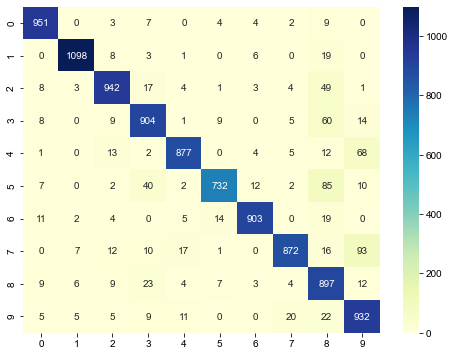

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(confuse_matrix, cmap="YlGnBu", annot=True,fmt=".0f")
sns.set(font_scale=1.5)
plt.show()

## KNN

In [26]:
class KNNClassifier():
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2,axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()
            
        return y_hat
            

In [27]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [25]:
# It will take long time
# y_hat = knn.predict(X_test,20)

In [26]:
# def accuracy(y,y_hat):
#     return np.mean(y_test == y_hat)

In [27]:
# accuracy(y_test,y_hat)

0.9633